In [1]:
from keras.datasets import boston_housing
from keras.models import  Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
x_train.shape

(404, 13)

In [4]:
x_test.shape

(102, 13)

 标准化: $X_t = \frac{X-mean}{std}$

In [5]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [6]:
def build_model():
    model = Sequential()
    # 64 > 13 : 层里的大小 要大于 特征数 先将维度放大, 在高维空间中抽取它的特征
    model.add(Dense(64,input_shape=(13,), activation='relu'))
    model.add(Dense(64,input_shape=(13,)))
    model.add(Dense(1, ))
    model.compile(optimizer=RMSprop(), loss='mse', metrics=['mae'])
    return model

交叉检验
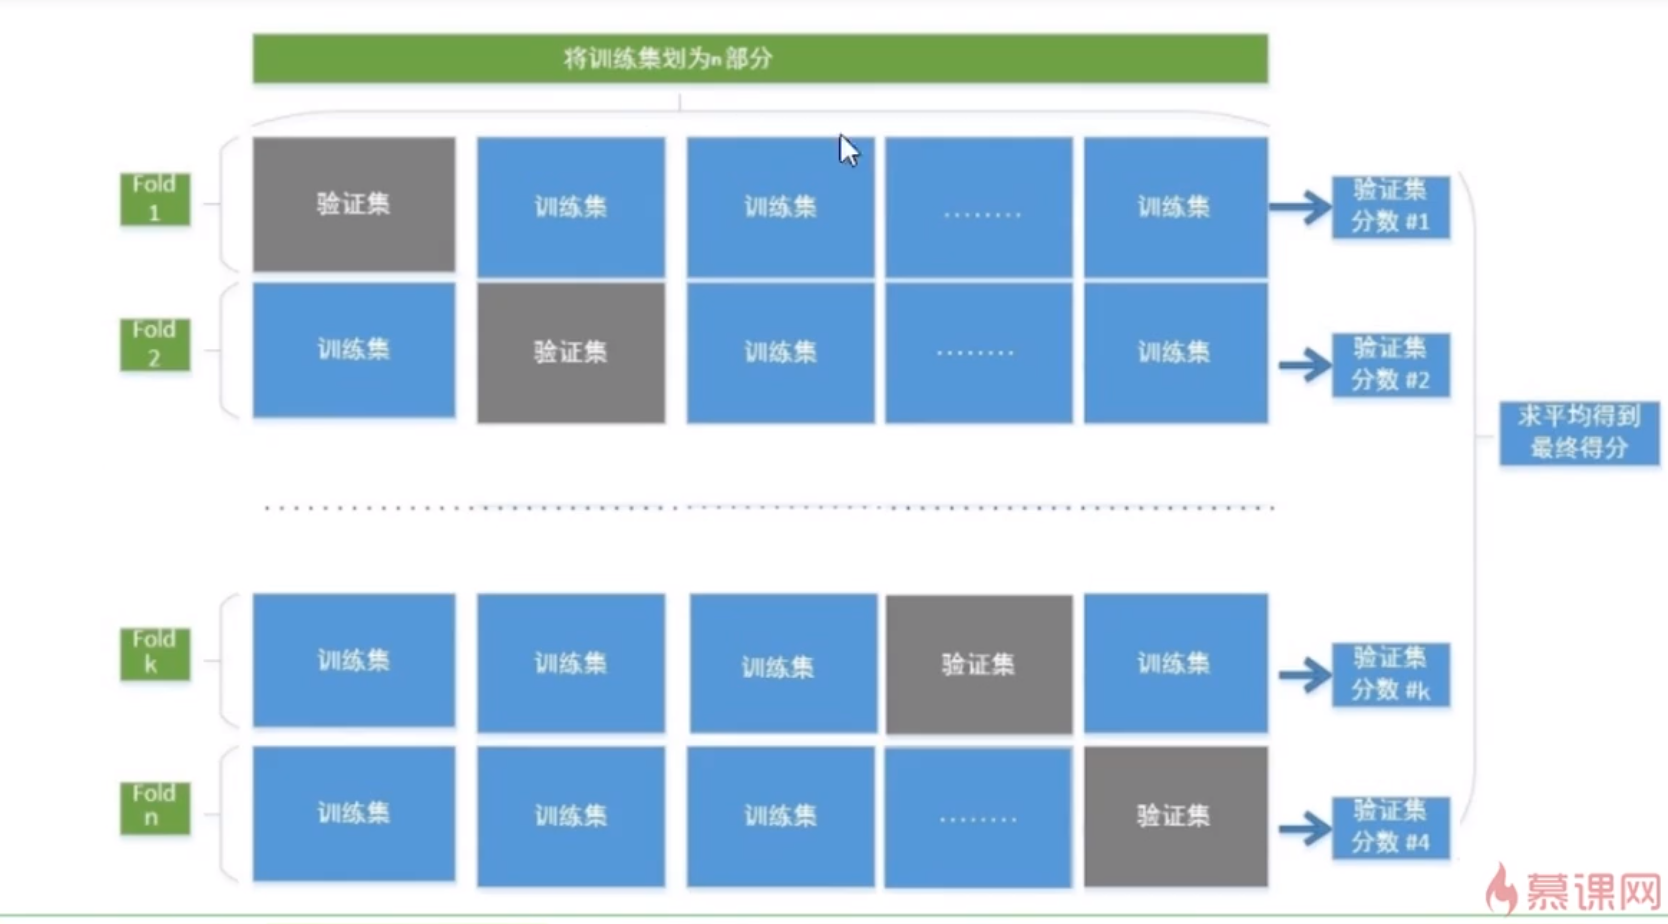

In [7]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_scores = []

In [8]:
for i in range(k):
    start = i*num_val_samples
    end = (i+1)*num_val_samples
    
    #验证集
    val_x = x_train[start : end]
    val_y = y_train[start : end]
    
    #np.concatenate 连接函数
    patrial_train_x = np.concatenate(
        [
            x_train[   :start],
            x_train[end:]
        ],
        axis = 0
    )
    patrial_train_y = np.concatenate(
        [
            y_train[   :start],
            y_train[end:]
        ],
        axis = 0
    )
    model = build_model()
    model.fit(patrial_train_x, patrial_train_y, 
              epochs=num_epochs, 
              batch_size=1, 
              verbose = False
             )
    val_mse, val_mae = model.evaluate(val_x, val_y, verbose=False)
    all_scores.append(val_mae)
    print('第{}折 : MSE:{},MAE:{}'.format(i+1, val_mse, val_mae))
    

第1折 : MSE:7.994264567252433,MAE:2.0354512658449684
第2折 : MSE:9.931445527784895,MAE:2.3073163481041936
第3折 : MSE:22.35958774963228,MAE:3.1154060198528932
第4折 : MSE:12.453273021348632,MAE:2.4370816473913663


In [9]:
np.mean(all_scores)

2.4738138202983553

In [10]:
model = build_model()
model.fit(x_train, y_train, epochs=80, batch_size=16,verbose=False)

In [11]:
test_mse, test_mae = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 3ms/step


In [12]:
test_mse

21.987282846488206